##1. 갓생 적금

## 구글 드라이브 마운트

In [1]:
from google.colab import drive  

drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


## package 설치

In [2]:
from openpyxl import load_workbook

##소비 횟수 및 카테고리별 적금정보 입력

In [48]:
datas = {'커피':0, '외식':0, '배달비':0, '뷰티/미용/쇼핑':0, '편의점/마트':0, '그외':0} #카테고리별 소비 횟수
savings = {'커피':['커피값 아끼기 적금', '주 5회','1,000원','5,000원','연 3.2%'],
           '외식':['외식값 아끼기 적금', '주 1회', '10,000원', '20,000원', '연 2.4%'],
           '배달비':['배달비 아끼기 적금', '주 3회', '15,000원', '30,000원', '연 3.2%'],
           '편의점/마트':['편의점/마트 아끼기 적금', '주 2회', '10,000원', '30,000원', '연 2.8%'],
           '뷰티/미용/쇼핑':['뷰티/미용/쇼핑 아끼기 적금', '월 1회', '10,000원', '100,000원', '연 2.6%'],
           '그외':['뭐든 아끼기 적금', '주 2회', '5,000원', '20,000원', '연 3%']} #카테고리별 적금 정보 -> 6개월 및 우대금리 +2%는 고정이므로 따로 값 생성X, 순서 : 적금명,최대납입횟수,최소금액,최대금액,기본금리


##카드이용내역


In [49]:
#엑셀 파일 읽기
wb = load_workbook('/content/MyDrive/MyDrive/카드이용내역.xlsx') 
ws = wb[wb.sheetnames[1]] #2번째 시트 사용 

##반복문

In [50]:
for r in range(2,ws.max_row+1): #2부터 시트의 최대 행까지 for문 돌림
    s = ws.cell(row=r, column=3).value #r번째 행 3번째 열을 읽음
    if s not in datas.keys(): #s가 datas.keys(), 즉 커피, 외식 등등에 해당하지 않을 경우(공란일 경우 포함)
        s = '그외' #s를 그 외로 지정함
    datas[s] = datas[s]+1 #datas[s]로 해당 카테고리의 소비횟수를 1 더함

l = [] #빈 리스트
for key in datas.keys():
    l.append(datas[key]) #각 소비 횟수를 l에 추가
saving = savings[list(datas.keys())[list(datas.values()).index(max(l))]]

##추천 적금 안내

In [51]:
s = 0 #sum = 0
for itm in l:
    s += itm
    #l (소비 횟수 리스트)의 전체 내용을 s에 더함 -> s : 총 소비횟수


print("당신의 소비는 ",end="") #줄바꿈 없이 출력
for key in datas.keys(): #key에 카테고리(커피, 외식 등등)를 넣어 for문 돌림
    print(str(key) + " " + str(round(datas[key] * 100 / s, 2)) + "%", end=" ") #str(key) : key를 문자열로 변환
    #str(round(datas[key] * 100 /s, 2)) : datas[key]로 해당 카테고리의 소비 횟수 가져옴 -> 100을 곱한 후 s(총 소비횟수) 나눔 -> 퍼센트값 -> round(~~, 2)로 소숫점 아래 두자리까지 자름 ->문자열 더하기를 이용하기 위해 str로 감싸 문자열로 s변환
print("입니다.")
print("추천하는 적금은 "+saving[0]+'입니다.이 적금은 기한 6개월의 상품이며, 최대 납입 횟수는 '+saving[1]+'입니다.\n이 적금은 1회 납입 시 최소 '+saving[2]+'부터 최대 '+saving[3]+'까지 납입하실 수 있습니다.\n금리는 기본 '+saving[4]+'이며, 우대 적용시 2%까지 추가적용 가능합니다.')

당신의 소비는 커피 12.93% 외식 18.82% 배달비 2.13% 뷰티/미용/쇼핑 23.57% 편의점/마트 11.13% 그외 31.42% 입니다.
추천하는 적금은 뭐든 아끼기 적금입니다.이 적금은 기한 6개월의 상품이며, 최대 납입 횟수는 주 2회입니다.
이 적금은 1회 납입 시 최소 5,000원부터 최대 20,000원까지 납입하실 수 있습니다.
금리는 기본 연 3%이며, 우대 적용시 2%까지 추가적용 가능합니다.


## 시각화

In [52]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [53]:
import matplotlib
import matplotlib.pyplot as plt # 맷플롯립 import 하기
import warnings 
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 

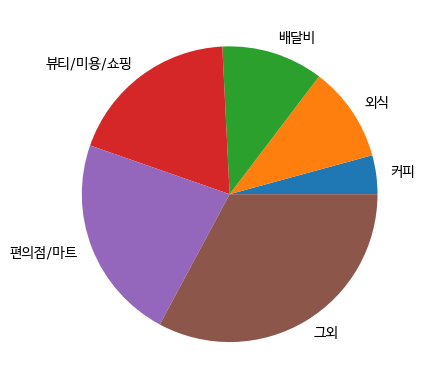

In [54]:
s_list = []

# 리스트의 요소들을 하나씩 더해가며 s_list에 추가
s = 0
for itm in l:
    s += itm
    s_list.append(s)

# 각 항목의 라벨을 정의
datas = ['커피', '외식', '배달비', '뷰티/미용/쇼핑', '편의점/마트', '그외']

# pie() 함수를 사용하여 원 그래프를 그림
plt.pie(s_list, labels=datas)

# 그래프를 출력
plt.show()


## 2. 갓생 예금

## package 설치

In [10]:
!pip install opencv-contrib-python
!pip install --upgrade google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# OCR Task

In [55]:
import os
import io
import numpy as np
import pandas as pd
import platform
import re
import calendar
import datetime

import cv2
from PIL import ImageFont, ImageDraw, Image

from google.cloud import vision

## 한국어 성능 향상을 위한 폰트 적용

In [56]:
# 한국어 인식 정확도 향상을 위한 폰트 작업
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    # PIL 이미지 타입 보장
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
    
    
    font = 'NanumGothic.ttf'   
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)

    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
    return opencv_image

## API 환경설정

In [57]:
# api 환경설정
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'key_account.json'
client_options = {'api_endpoint': 'eu-vision.googleapis.com'}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [58]:
path = 'example.jpg' 
with io.open(path, 'rb') as image_file:
    content = image_file.read()

## API로 텍스트 추출

In [59]:
# 구글 api와 연동
image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
print('구글 드라이브 API 연동 완료')

구글 드라이브 API 연동 완료


## 원본 텍스트 블럭에서 텍스트만 추출

In [60]:
# 이미지 불러오기
img = cv2.imread(path)
roi_img = img.copy()

# 각 텍스트 블럭마다 수행
print('이미지에서 사진 추출...') 
for text in texts:
    # 출력
    # print('\n"{}"'.format(text.description))
 
    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])
    
    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y
    
    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30) # 폰트 적용
 
 # 예외처리
if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))
print('작업 완료!')

이미지에서 사진 추출...
작업 완료!


In [61]:
# 첫 인덱스의 텍스트 뭉치만 사용
for idx, text in enumerate(texts):
  document = text.description
  if idx == 0:
    break
    
# 텍스트를 리스트에 저장
document_list = document.replace(' ','').split('\n')

## 사용할 정보 추출

In [62]:
""" 
  추출할 정보 
  1. 연령 2. 신장 3. 날짜 4. 시간 5. 체지방률 6. BMI 
"""
target_feature = ['연령', '신장', '날짜', '시간','체지방률','BMI']
global fat_rate, today
for text in document_list:
  tar_text = text.replace(' ','')

  for feature in target_feature:
    if feature in tar_text:
      # 숫자, :, .만 추출
      extract_num = re.sub(r'[^0-9.:]', '', tar_text) 

      # 추출할 정보 있는 경우
      if extract_num != '': 
        # 예외 처리
        extract_num = extract_num[1:] if extract_num[0]==':' else extract_num
        print(f'{feature} : {extract_num}')

        if feature == '체지방률':
          fat_rate = extract_num
        elif feature == '날짜':
          today_date = list(map(int,extract_num.split('.')))
          today = datetime.date(today_date[0], today_date[1], today_date[2])

        # 추출 정보 중복 출력 방지
        target_feature.remove(feature)
        break

연령 : 31
신장 : 160
날짜 : 2023.05.05
시간 : 08:59:48
BMI : 19.7
체지방률 : 31.9


# 사진에서 추출한 정보 바탕으로 데이터 업데이트 

In [63]:
history_df = pd.read_csv('./userHistory .csv')

In [64]:
# datetime & string 관련 함수
def get_day(date):
  days=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
  return days[date.weekday()]
def string_to_date(str_date):
  return datetime.datetime.strptime(str_date, '%Y-%m-%d')
def string_to_week(str_date):
  return datetime.datetime.strptime(str_date, '%Y-%m-%d').date().isocalendar().week

In [65]:
# 인증현황 출력해주는 함수
def print_calendar(today,history):
  days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
  print(" " * 17, '이번 주 인증현황\n')
  for day in days:
    print(day + "\t", end = ' ')
  print('')
  
  # 해당 주간 데이터 뽑기
  same_week = []
  for day in history:
    if string_to_week(day) == today.isocalendar().week:
      same_week.append(day)
  start_of_week = today - datetime.timedelta(days=today.weekday())
  print('=' * 55)

  # 해당 주간에 대한 날짜 출력
  for i in range(7):
    print(start_of_week.month ,'/',start_of_week.day,'\t' ,end='')
    start_of_week += datetime.timedelta(days=1)
  print('')
  print('=' * 55)

  # 해당 주간 인증 현황
  check_this_week = ['X' for i in range(7)]
  for day in same_week:
    check_this_week[string_to_date(day).weekday()] = 'O'
  for i in check_this_week:
    print(" ",i, end ='\t')
  print('')

In [66]:
# history 데이터프레임에 저장된 유저 인증 정보
history_df

,date,fatRate
0,2023-04-01,32.476556
1,2023-04-02,33.812962
2,2023-04-03,33.668333
3,2023-04-04,31.667107
4,2023-04-09,32.624697
5,2023-04-11,30.657747
6,2023-04-15,31.625957
7,2023-04-16,31.605392
8,2023-04-26,32.126030
9,2023-04-29,32.243098


In [67]:
# 이번주 인증 현황 기록
cnt_week = 0 
for date in history_df['date']:
  if string_to_week(date) == today.isocalendar().week:
    cnt_week+=1
today_pd = [today.strftime('%Y-%m-%d'), fat_rate]
history_df.loc[len(history_df)] = today_pd
print_calendar(today,history_df['date'])


print(f'\n\n{today.year}년 {today.month}월 {today.day}일 인증이 완료되었습니다!\n')
if cnt_week < 2:
  print(f'이번주 {2-cnt_week}번 더 운동하시면 인증완료!')
else:
  print(f'이번 주 운동 인증 완료!')

                  이번 주 인증현황

Mon	 Tue	 Wed	 Thu	 Fri	 Sat	 Sun	 
5 / 1 	5 / 2 	5 / 3 	5 / 4 	5 / 5 	5 / 6 	5 / 7 	
  O	  X	  O	  X	  O	  X	  X	


2023년 5월 5일 인증이 완료되었습니다!

이번 주 운동 인증 완료!
